В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv("C:/Users/linam/ML_Projects/Lectures/2.1/cars.csv")

In [3]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

Signature:
pd.DataFrame.info(
    self,
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in


In [5]:
cars_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
cars_df.shape

(100, 13)

In [7]:
cars_df.describe

<bound method NDFrame.describe of     Car_ID     Brand          Model  Year  Kilometers_Driven Fuel_Type  \
0        1    Toyota        Corolla  2018              50000    Petrol   
1        2     Honda          Civic  2019              40000    Petrol   
2        3      Ford        Mustang  2017              20000    Petrol   
3        4    Maruti          Swift  2020              30000    Diesel   
4        5   Hyundai         Sonata  2016              60000    Diesel   
..     ...       ...            ...   ...                ...       ...   
95      96  Mercedes        C-Class  2019              22000    Diesel   
96      97    Toyota  Innova Crysta  2017              38000    Diesel   
97      98      Ford       EcoSport  2018              26000    Petrol   
98      99   Hyundai          Verna  2019              24000    Petrol   
99     100      Tata         Altroz  2020              18000    Petrol   

   Transmission Owner_Type  Mileage  Engine  Power  Seats    Price  
0       

In [8]:
cars_df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [9]:
cars_df.select_dtypes(include = "object").columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [10]:
len(cars_df.select_dtypes(include = "object").columns)

5

In [11]:
cars_df.select_dtypes(include = "number").columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [12]:
len(cars_df.select_dtypes(include = "number").columns)

8

In [13]:
def cars_unique(dataframe, column):
    unique_count = dataframe[column].nunique()  # Кількість унікальних значень
    unique_values = dataframe[column].unique()  # Самі унікальні значення
    print("Кількість унікальних значень:", unique_count)
    print("Унікальні значення:", unique_values)
    return unique_count, unique_values

In [14]:
unique_count, unique_values = cars_unique(cars_df, 'Brand')

Кількість унікальних значень: 11
Унікальні значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']


In [15]:
unique_count, unique_values = cars_unique(cars_df, 'Model')

Кількість унікальних значень: 58
Унікальні значення: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']


In [16]:
unique_count, unique_values = cars_unique(cars_df, 'Fuel_Type')

Кількість унікальних значень: 2
Унікальні значення: ['Petrol' 'Diesel']


In [17]:
unique_count, unique_values = cars_unique(cars_df, 'Transmission')

Кількість унікальних значень: 2
Унікальні значення: ['Manual' 'Automatic']


In [18]:
unique_count, unique_values = cars_unique(cars_df, 'Owner_Type')

Кількість унікальних значень: 3
Унікальні значення: ['First' 'Second' 'Third']


In [19]:
def analyze_column(df, column_name):
    if column_name not in df.columns:
        return f"Column '{column_name}' does not exist in the DataFrame."
    
    analysis = {
        'Value Counts': df[column_name].value_counts(),
        'Quantiles': df[column_name].quantile([0.25, 0.5, 0.75, 1]),
        'Mode': df[column_name].mode()[0],
        'Mean': df[column_name].mean(),
    }
    
    main_char = f"Analysis for column: '{column_name}'\n"
    main_char += "-" * 40 + "\n"
    
    for key, value in analysis.items():
        main_char += f"{key}:\n{value}\n"
        main_char += "-" * 40 + "\n"
    
    return main_char

In [20]:
column_name = 'Year'
main_char = analyze_column(cars_df, column_name)
print(main_char)

Analysis for column: 'Year'
----------------------------------------
Value Counts:
Year
2018    28
2019    28
2017    21
2020    17
2016     4
2021     2
Name: count, dtype: int64
----------------------------------------
Quantiles:
0.25    2017.75
0.50    2018.00
0.75    2019.00
1.00    2021.00
Name: Year, dtype: float64
----------------------------------------
Mode:
2018
----------------------------------------
Mean:
2018.39
----------------------------------------



In [21]:
column_name = 'Kilometers_Driven'
main_char = analyze_column(cars_df, column_name)
print(main_char)

Analysis for column: 'Kilometers_Driven'
----------------------------------------
Value Counts:
Kilometers_Driven
26000    12
28000    11
38000    11
22000    11
32000     9
18000     8
24000     7
15000     7
30000     6
42000     5
40000     2
50000     2
20000     2
35000     2
10000     2
45000     1
60000     1
25000     1
Name: count, dtype: int64
----------------------------------------
Quantiles:
0.25    22000.0
0.50    27000.0
0.75    32000.0
1.00    60000.0
Name: Kilometers_Driven, dtype: float64
----------------------------------------
Mode:
26000
----------------------------------------
Mean:
28150.0
----------------------------------------



In [22]:
column_name = 'Mileage'
main_char = analyze_column(cars_df, column_name)
print(main_char)

Analysis for column: 'Mileage'
----------------------------------------
Value Counts:
Mileage
17    18
18    15
15    11
20    10
16     8
12     8
14     6
13     5
19     5
25     3
23     3
24     3
22     2
21     2
10     1
Name: count, dtype: int64
----------------------------------------
Quantiles:
0.25    15.0
0.50    17.0
0.75    19.0
1.00    25.0
Name: Mileage, dtype: float64
----------------------------------------
Mode:
17
----------------------------------------
Mean:
17.21
----------------------------------------



In [23]:
column_name = 'Engine'
main_char = analyze_column(cars_df, column_name)
print(main_char)

Analysis for column: 'Engine'
----------------------------------------
Value Counts:
Engine
1498    8
1497    7
1968    6
1462    5
2755    5
1199    5
1950    4
1995    4
1197    4
1194    3
1582    3
1956    3
2198    3
1395    3
2998    2
2967    2
1047    2
1984    2
2184    2
1991    2
2487    2
2261    2
1598    2
2143    2
2993    2
2996    2
1496    2
1086    2
1998    2
1248    1
1597    1
4951    1
999     1
2179    1
1198    1
1999    1
Name: count, dtype: int64
----------------------------------------
Quantiles:
0.25    1462.0
0.50    1774.0
0.75    2143.0
1.00    4951.0
Name: Engine, dtype: float64
----------------------------------------
Mode:
1498
----------------------------------------
Mean:
1855.23
----------------------------------------



In [24]:
column_name = 'Power'
main_char = analyze_column(cars_df, column_name)
print(main_char)

Analysis for column: 'Power'
----------------------------------------
Value Counts:
Power
103    7
187    6
98     5
148    5
174    4
191    4
241    3
74     3
126    3
94     3
85     3
171    3
113    3
158    3
108    2
140    2
170    2
176    2
396    2
106    2
130    2
362    2
261    2
150    2
84     2
115    2
258    2
81     2
68     2
69     2
245    2
335    2
121    2
76     1
194    1
395    1
190    1
167    1
141    1
181    1
Name: count, dtype: int64
----------------------------------------
Quantiles:
0.25    103.0
0.50    148.0
0.75    187.0
1.00    396.0
Name: Power, dtype: float64
----------------------------------------
Mode:
103
----------------------------------------
Mean:
158.13
----------------------------------------



In [25]:
column_name = 'Seats'
main_char = analyze_column(cars_df, column_name)
print(main_char)

Analysis for column: 'Seats'
----------------------------------------
Value Counts:
Seats
5    81
7    14
4     5
Name: count, dtype: int64
----------------------------------------
Quantiles:
0.25    5.0
0.50    5.0
0.75    5.0
1.00    7.0
Name: Seats, dtype: float64
----------------------------------------
Mode:
5
----------------------------------------
Mean:
5.23
----------------------------------------



In [26]:
# ПРосто для себе глянути, але так як це target, то не аналізуємо сильно.

column_name = 'Price'
main_char = analyze_column(cars_df, column_name)
print(main_char)

Analysis for column: 'Price'
----------------------------------------
Value Counts:
Price
850000     8
600000     6
650000     6
500000     6
700000     6
2700000    5
1600000    5
750000     5
2800000    4
3200000    4
2500000    4
1800000    3
2000000    3
800000     3
1400000    3
3000000    3
550000     3
1300000    2
1500000    2
450000     2
3500000    2
4000000    2
1200000    2
2600000    2
2400000    2
2900000    2
1900000    1
1000000    1
2300000    1
2200000    1
900000     1
Name: count, dtype: int64
----------------------------------------
Quantiles:
0.25     700000.0
0.50    1300000.0
0.75    2500000.0
1.00    4000000.0
Name: Price, dtype: float64
----------------------------------------
Mode:
850000
----------------------------------------
Mean:
1574000.0
----------------------------------------



##### Висновок
В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення): 'Fuel_Type' і 'Transmission'
- 3 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку:
  'Brand', 'Model', 'Owner_Type'

По числових колонках:
'Price' - target, не аналізуємо.
'Car_ID' - в принципі, нам не потрібен, не містить ніякої інформації.
'Year' - можна було б поділити, але так як тут всього 6 значень, то немає сенсу.
'Seats' - всього 3 значення, то теж не перерозподіляємо.
'Kilometers_Driven' - можна роздалити на категорії. Вважаю, що найкраще буде розподілити на категорії типу до 20 тис, 21-40 і т.д., так як тут є великий розкид чисел. Для позначення використаємо числа як категорії.
'Mileage' - також можемо розділити на: з низькою ефективністю, середноью, високою.
'Engine' - "Малий двигун", "Середній двигун", "Великий двигун".
'Power' - розділимо на 3 категорії: малопотужні двигуни, середньої потужності і високопотужні.

- То ж, у нас є 4 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)

In [27]:
cars_df = cars_df.dropna(subset=["Engine"])

In [28]:
cars_df["Engine"] = pd.to_numeric(cars_df["Engine"], errors="coerce")

In [29]:
# Створення категорій
bins_engine = [0, 1500, 2500, 5000]  # Діапазони
labels_engine = ["Small Engine", "Medium Engine", "Large Engine"]

cars_df["Engine_Category"] = pd.cut(cars_df["Engine"], bins=bins_engine, labels=labels_engine)

In [30]:
print(cars_df[["Engine", "Engine_Category"]].head())

   Engine Engine_Category
0    1498    Small Engine
1    1597   Medium Engine
2    4951    Large Engine
3    1248    Small Engine
4    1999   Medium Engine


In [31]:
# Діапазони для категорій
mileage_bins = [0, 12, 18, float("inf")]
mileage_labels = ["Low Mileage", "Average Mileage", "High Mileage"]

power_bins = [0, 100, 200, float("inf")]
power_labels = ["Low Power", "Moderate Power", "High Power"]

kilometers_bins = [0, 20000, 40000, 60000, 100000, float("inf")]
kilometers_labels = ["0-20 km", "21-40 km", "41-60 km", "61-100 km", "100+ km"]

# Створення нових колонок для категорій
cars_df["Mileage_Category"] = pd.cut(cars_df["Mileage"], bins=mileage_bins, labels=mileage_labels)
cars_df["Power_Category"] = pd.cut(cars_df["Power"], bins=power_bins, labels=power_labels)
cars_df["Kilometers_Category"] = pd.cut(cars_df["Kilometers_Driven"], bins=kilometers_bins, labels=kilometers_labels)

# Перевірка результату
print(cars_df[["Mileage", "Mileage_Category", "Power", "Power_Category", "Kilometers_Driven", "Kilometers_Category"]])

    Mileage Mileage_Category  Power  Power_Category  Kilometers_Driven  \
0        15  Average Mileage    108  Moderate Power              50000   
1        17  Average Mileage    140  Moderate Power              40000   
2        10      Low Mileage    395      High Power              20000   
3        23     High Mileage     74       Low Power              30000   
4        18  Average Mileage    194  Moderate Power              60000   
..      ...              ...    ...             ...                ...   
95       16  Average Mileage    191  Moderate Power              22000   
96       13  Average Mileage    171  Moderate Power              38000   
97       18  Average Mileage    121  Moderate Power              26000   
98       17  Average Mileage    113  Moderate Power              24000   
99       20     High Mileage     85       Low Power              18000   

   Kilometers_Category  
0             41-60 km  
1             21-40 km  
2              0-20 km  
3          

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [64]:
inputs = cars_df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']]
targets = cars_df["Price"] 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

In [66]:
# Навчання моделі на тренувальних даних
model = LinearRegression().fit(X_train, y_train)

# Прогнозування на тестових даних
predictions_test = model.predict(X_test)

# Обчислення втрат (Test Loss)
test_loss = mean_squared_error(y_test, predictions_test)
print('Test Loss:', test_loss)

Test Loss: 177395690368.06238


In [67]:
# Прогнозування на тренувальних даних
predictions_train = model.predict(X_train)

# Обчислення втрат (Training Loss)
training_loss = mean_squared_error(y_train, predictions_train)
print('Training Loss:', training_loss)

Training Loss: 266597311876.89288


##### Висновок: Дуже великі числа, то ж або великі "шуми" в даних, треба посистити ну або... щось неправильно)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [37]:
cars_df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [38]:
cars_df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [39]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
cars_df['fuel_type_codes'] = cars_df.Fuel_Type.map(fuel_type_codes)

In [40]:
cars_df['Transmission'].value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [41]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
cars_df['Transmission_codes'] = cars_df.Transmission.map(Transmission_codes)

In [42]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Engine_Category,Mileage_Category,Power_Category,Kilometers_Category,fuel_type_codes,Transmission_codes
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,Small Engine,Average Mileage,Moderate Power,41-60 km,1,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,Medium Engine,Average Mileage,Moderate Power,21-40 km,1,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,Large Engine,Low Mileage,High Power,0-20 km,1,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,Small Engine,High Mileage,Low Power,21-40 km,0,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,Medium Engine,Average Mileage,Moderate Power,41-60 km,0,1


In [70]:
print(X_train.head())
print(X_test.head())

    Year  Kilometers_Driven  Mileage  Engine  Power  Seats
83  2019              22000       18    1498    148      5
55  2018              28000       17    1968    187      5
26  2018              28000       15    1984    241      5
54  2017              32000       18    1598    103      5
19  2017              26000       12    1991    241      5
    Year  Kilometers_Driven  Mileage  Engine  Power  Seats
17  2016              38000       15    1395    148      5
41  2019              26000       20    1086     68      5
92  2017              32000       18    1598    103      5
14  2020              18000       19    1462    103      7
68  2019              26000       20    1194     94      5


In [82]:
# ПРОБА
#Додаємо колонки без змін до X_train і X_test
X_train['Owner_Type'] = cars_df.loc[X_train.index, 'Owner_Type']
X_test['Owner_Type'] = cars_df.loc[X_test.index, 'Owner_Type']

#X_train['Transmission'] = cars_df.loc[X_train.index, 'Transmission']
#X_test['Transmission'] = cars_df.loc[X_test.index, 'Transmission']

#X_train['Fuel_Type'] = cars_df.loc[X_train.index, 'Fuel_Type']
#X_test['Fuel_Type'] = cars_df.loc[X_test.index, 'Fuel_Type']

In [79]:
#X_train = X_train.drop(columns=['Transmission', 'Fuel_Type', 'Owner_Type'])
#X_test = X_test.drop(columns=['Transmission', 'Fuel_Type', 'Owner_Type'])

In [76]:
X_train = X_train.join(cars_df[['fuel_type_codes', 'Transmission_codes']], how='left')
X_test = X_test.join(cars_df[['fuel_type_codes', 'Transmission_codes']], how='left')

In [80]:
print(X_train.head())
print(X_test.head())

    Year  Kilometers_Driven  Mileage  Engine  Power  Seats  fuel_type_codes  \
83  2019              22000       18    1498    148      5                1   
55  2018              28000       17    1968    187      5                0   
26  2018              28000       15    1984    241      5                1   
54  2017              32000       18    1598    103      5                1   
19  2017              26000       12    1991    241      5                1   

    Transmission_codes  
83                   1  
55                   1  
26                   1  
54                   0  
19                   1  
    Year  Kilometers_Driven  Mileage  Engine  Power  Seats  fuel_type_codes  \
17  2016              38000       15    1395    148      5                1   
41  2019              26000       20    1086     68      5                1   
92  2017              32000       18    1598    103      5                1   
14  2020              18000       19    1462    103      7 

In [83]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [84]:
print(X_train.head())
print(X_test.head())

    Year  Kilometers_Driven  Mileage  Engine  Power  Seats  fuel_type_codes  \
83  2019              22000       18    1498    148      5                1   
55  2018              28000       17    1968    187      5                0   
26  2018              28000       15    1984    241      5                1   
54  2017              32000       18    1598    103      5                1   
19  2017              26000       12    1991    241      5                1   

    Transmission_codes Owner_Type  Owner_Type_Codes  
83                   1     Second               1.0  
55                   1      First               0.0  
26                   1      First               0.0  
54                   0     Second               1.0  
19                   1     Second               1.0  
    Year  Kilometers_Driven  Mileage  Engine  Power  Seats  fuel_type_codes  \
17  2016              38000       15    1395    148      5                1   
41  2019              26000       20    108

In [85]:
X_train = X_train.drop(columns=['Owner_Type'])
X_test = X_test.drop(columns=['Owner_Type'])

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

In [48]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(cars_df[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [49]:
one_hot = enc.transform(cars_df[['Brand']]).toarray()
one_hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [50]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [51]:
cars_df[enc.categories_[0]] = one_hot

In [96]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
categories_list = enc.categories_[0].tolist()
categories_list

['Audi',
 'BMW',
 'Ford',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Tata',
 'Toyota',
 'Volkswagen']

In [90]:
categories_string = ', '.join(categories_list)
X_train['Categories_Info'] = categories_string
X_test['Categories_Info'] = categories_string

In [91]:
print(X_train.head())
print(X_test.head())

    Year  Kilometers_Driven  Mileage  Engine  Power  Seats  fuel_type_codes  \
83  2019              22000       18    1498    148      5                1   
55  2018              28000       17    1968    187      5                0   
26  2018              28000       15    1984    241      5                1   
54  2017              32000       18    1598    103      5                1   
19  2017              26000       12    1991    241      5                1   

    Transmission_codes  Owner_Type_Codes  \
83                   1               1.0   
55                   1               0.0   
26                   1               0.0   
54                   0               1.0   
19                   1               1.0   

                                      Categories_Info  
83  Audi, BMW, Ford, Honda, Hyundai, Mahindra, Mar...  
55  Audi, BMW, Ford, Honda, Hyundai, Mahindra, Mar...  
26  Audi, BMW, Ford, Honda, Hyundai, Mahindra, Mar...  
54  Audi, BMW, Ford, Honda, Hyundai,

In [92]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = mean_squared_error(targets, predictions)
  print('Loss:', loss)
  return model

In [ ]:
print(X_train.head())
print(X_test.head())

In [95]:
# Навчання моделі на тренувальних даних
model = LinearRegression().fit(X_train, y_train)

# Прогнозування на тестових даних
predictions_test = model.predict(X_test)

# Обчислення втрат (Test Loss)
test_loss = mean_squared_error(y_test, predictions_test)
print('Test Loss:', test_loss)

ValueError: could not convert string to float: 'Audi, BMW, Ford, Honda, Hyundai, Mahindra, Maruti, Mercedes, Tata, Toyota, Volkswagen'

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [99]:
import pandas as pd

# 1. Вибираємо лише числові колонки
X_train_numeric = X_train.select_dtypes(include=['number'])

# 2. Об'єднуємо дані X_train_numeric із y_train
train_data = pd.concat([X_train_numeric, y_train], axis=1)

# 3. Побудова матриці кореляції
correlation_matrix = train_data.corr()

# Виводимо матрицю кореляції
print("Correlation Matrix:")
print(correlation_matrix)

# 4. Аналіз кореляції з цільовою змінною 'Price'
target_correlation = correlation_matrix['Price']

# Фільтруємо колонки з кореляцією більше за 0.5 або менше за -0.5
strong_correlation = target_correlation[abs(target_correlation) > 0.5]

print("\nColumns with strong correlation with 'Price' (|correlation| > 0.5):")
print(strong_correlation)

Correlation Matrix:
                        Year  Kilometers_Driven   Mileage    Engine     Power  \
Year                1.000000          -0.708525  0.278559 -0.392764 -0.248442   
Kilometers_Driven  -0.708525           1.000000 -0.126621  0.101219 -0.060803   
Mileage             0.278559          -0.126621  1.000000 -0.710516 -0.684705   
Engine             -0.392764           0.101219 -0.710516  1.000000  0.801638   
Power              -0.248442          -0.060803 -0.684705  0.801638  1.000000   
Seats              -0.278755           0.403656 -0.178619  0.167326 -0.139388   
fuel_type_codes     0.248515          -0.332351 -0.070112 -0.174455  0.076357   
Transmission_codes -0.200603          -0.066491 -0.399164  0.456296  0.586910   
Owner_Type_Codes   -0.014499          -0.001772  0.026624 -0.196106 -0.204309   
Price              -0.233769          -0.083951 -0.638404  0.710561  0.849137   

                       Seats  fuel_type_codes  Transmission_codes  \
Year               

In [100]:
df_for_viz = pd.concat([X_train.select_dtypes('number'), y_train], axis=1)

In [101]:
df_for_viz

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,Transmission_codes,Owner_Type_Codes,Price
83,2019,22000,18,1498,148,5,1,1,1.0,1600000
55,2018,28000,17,1968,187,5,0,1,0.0,2600000
26,2018,28000,15,1984,241,5,1,1,0.0,3200000
54,2017,32000,18,1598,103,5,1,0,1.0,650000
19,2017,26000,12,1991,241,5,1,1,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...
3,2020,30000,23,1248,74,5,0,0,2.0,600000
2,2017,20000,10,4951,395,4,1,1,0.0,2500000
6,2018,45000,15,2179,140,7,0,1,1.0,900000
27,2019,22000,18,1995,187,5,0,1,1.0,2800000


<Axes: >

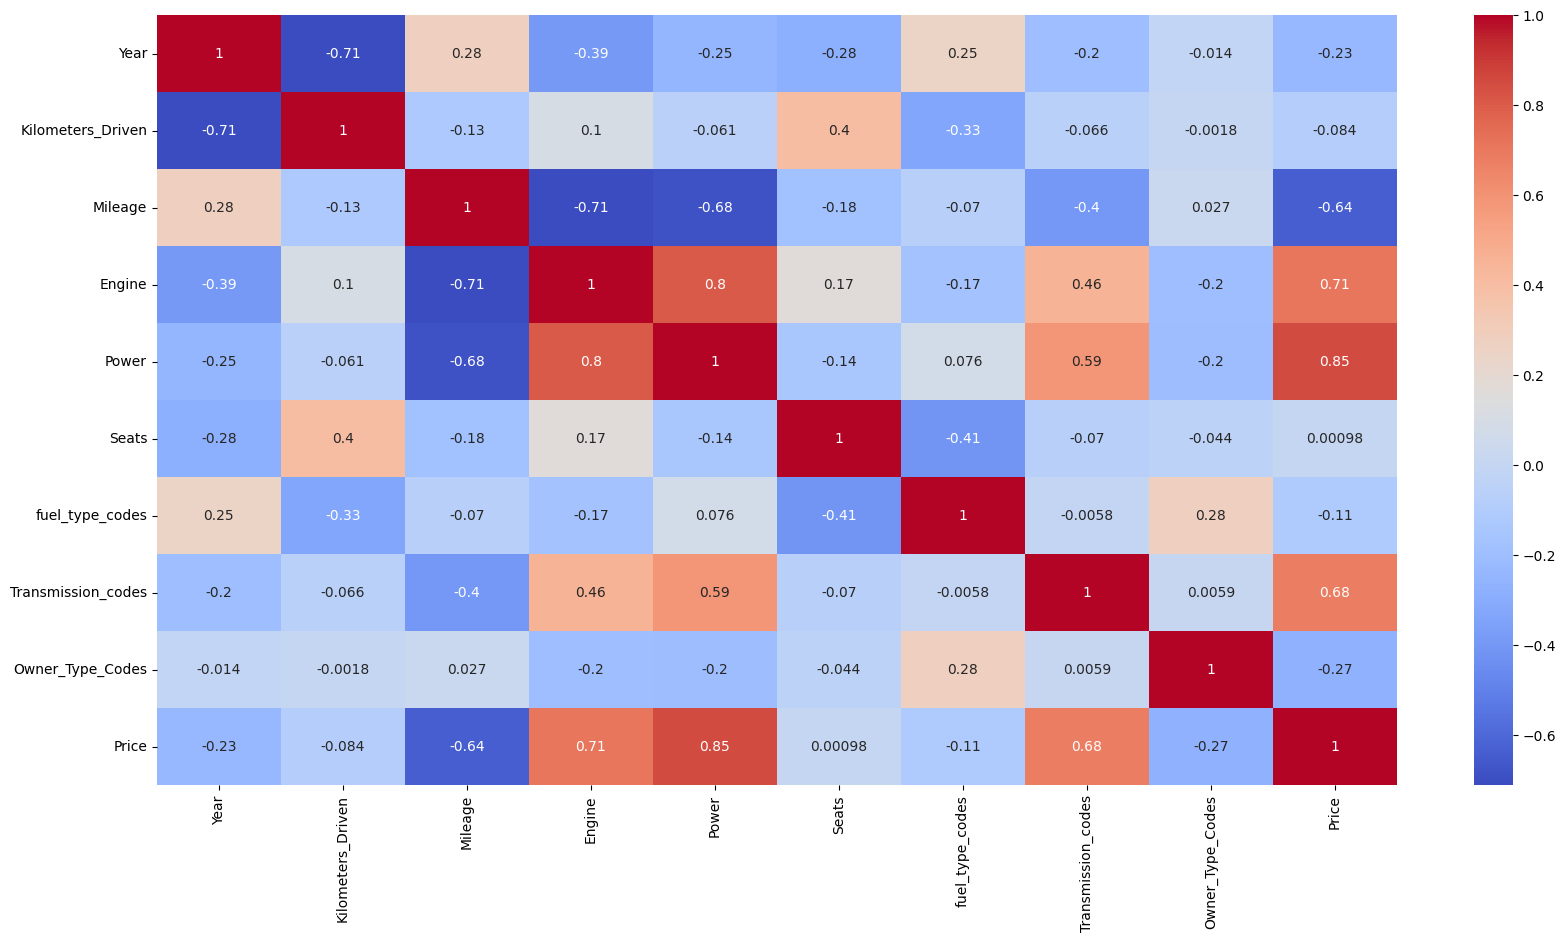

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(df_for_viz.corr(),annot=True,cmap="coolwarm")

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [103]:
X_train.drop(columns=X_train.select_dtypes('object').columns, inplace=True)
X_test.drop(columns=X_test.select_dtypes('object').columns, inplace=True)

In [106]:
# Створюємо і одразу тренуємо модель
model = LinearRegression().fit(X_train, y_train)

# Робимо передбачення моделлю
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Разуємо лосс
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss, 2)}')

Помилка моделі на тренувальному наборі даних: 177721183626.04
Помилка моделі на тестувальному наборі даних: 102210816527.74


Точно щось не так))

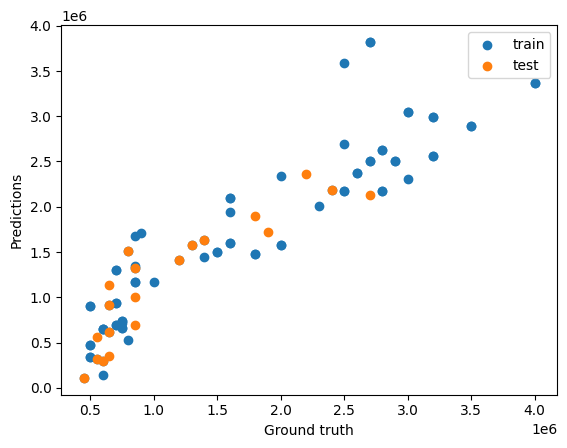

In [107]:
plt.scatter(y_train, y_train_pred, label='train')
plt.scatter(y_test, y_test_pred, label='test')
plt.xlabel('Ground truth')
plt.ylabel('Predictions')
plt.legend();

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [108]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [109]:
model = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss, 2)}')

Помилка моделі на тренувальному наборі даних: 177721183626.03
Помилка моделі на тестувальному наборі даних: 102210816527.74


In [110]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight').round(2).style.background_gradient()

,feature,weight
1,Kilometers_Driven,-203061.040000
2,Mileage,-190995.890000
6,fuel_type_codes,-182478.250000
3,Engine,-151810.800000
8,Owner_Type_Codes,-110556.780000
0,Year,-104747.100000
5,Seats,77822.560000
7,Transmission_codes,272561.290000
4,Power,672683.240000
9,1,1680000.000000


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [111]:
import statsmodels.api as sm

X = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     39.00
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           7.81e-24
Time:                        23:51:07   Log-Likelihood:                -1149.7
No. Observations:                  80   AIC:                             2319.
Df Residuals:                      70   BIC:                             2343.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   5.04

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?